# Part 1

# I. High Level Outline

# Data Features:  

task_completed(Target): A binary variable indicating whether a task is completed (1) or not (0).  

employee_experience: A numerical variable representing the employee's experience.  

training_level4: A binary variable representing a specific training level (4).  

training_level6: A binary variable representing a specific training level (6).  

training_level8: A binary variable representing a specific training level (8). 

# Outline of Tasks ahead:

# 1. Background: 
Provide context about the problem, its importance, and key stakeholders.

# 2.Data: 
Describe the data, its preprocessing, and the need for train/test split and potential data normalization.

# 3.Classification Modeling:

Implement k-Nearest Neighbors (kNN) classification.  

Determine the best "k" value from a list of odd numbers.  

Train the final kNN model using the selected "k."  

Create a table of performance measures across various probability thresholds, including TN, TP, FN, FP, Precision, Recall, F1, and Accuracy.  


# 5.Logistic Model:

Train a Logistic Regression model.  

Create a table of performance measures, similar to the kNN model.  

# 6.Select Winning Model:

Choose between the kNN and Logistic models based on their performance measures.  

Provide justification for the model choice.

# 7.Evaluation of Winning Model:

Select a low probability threshold (0 to 0.4) and discuss its business implications in terms of performance measures.  

Analyze the impact of False Positives and False Negatives on the business and potential costs.  

# 8. Explore Multiple Probability Thresholds:

Choose two more probability thresholds and repeat the performance evaluation.  

Consider the associated risks and costs for each threshold.  



# II. Brief Background Section

# 1. Problem: 
In this dataset, the primary problem is to predict whether tasks are completed (task_completed = 1) or not (task_completed = 0) based on various features related to employee experience, training levels, and possibly other factors that are not explicitly provided. The objective is to build a classification model that can make these predictions.

# 2. Importance: 
This prediction task is significant for the HR department's resource allocation. If the HR team can accurately predict task completions and non-completions, they can assign tasks more effectively. This can lead to improved productivity, optimized resource allocation, and better management of human resources within the business.

# 3. Key Stakeholders:

# i. HR Department: 
The HR department is the primary stakeholder, as they are the ones who will utilize the model's predictions to make decisions regarding task assignments.

# ii. Business Managers: 
Business managers may also benefit from these predictions, as they can ensure that the right tasks are assigned to employees with a higher likelihood of completing them.

# iii. Employees:
Employees might indirectly be affected by these predictions, as they could receive tasks that are more aligned with their experience and training levels.

# III. Data Section

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\Aditi\Downloads\SystemAdministrators.csv")
data.head()

,task_completed,employee_experience,training_level4,training_level6,training_level8
0,1,10.9,1,0,0
1,1,9.9,1,0,0
2,1,10.4,0,1,0
3,1,13.7,0,1,0
4,1,9.4,0,0,1


In [3]:
X = data.drop(columns=['task_completed'])
y = data['task_completed']

# Scaling the data to make the upper and lower limits of every feature constant

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# IV. Classification Modeling

# KNN

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 21, 2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled, y)
    pred_i = knn.predict(X_scaled)
    acc = accuracy_score(y, pred_i)
    accuracy.append(acc)
    
# Create a DataFrame to display k values and accuracy values
accuracy_df = pd.DataFrame({'K Value': range(1,21, 2), 'Accuracy': accuracy})

# Display the DataFrame
accuracy_df

,K Value,Accuracy
0,1,0.946667
1,3,0.920000
2,5,0.893333
3,7,0.880000
4,9,0.853333
5,11,0.866667
6,13,0.840000
7,15,0.840000
8,17,0.813333
9,19,0.813333


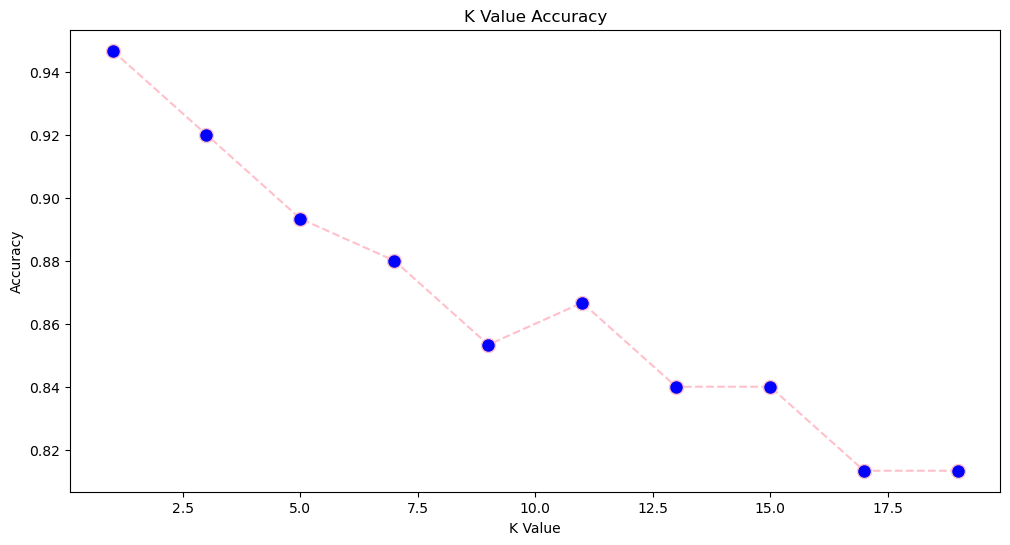

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))   

plt.plot(range(1, 21,2), accuracy, color='pink', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
         
plt.title('K Value Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy');   

# From the dataframe and the graph it is clear that the best value is k =1

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store performance metrics
threshold_metrics = []

for threshold in thresholds:
    # Calculate predicted probabilities using the best k value (e.g., k=1)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_scaled, y)
    probabilities = knn.predict_proba(X_scaled)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    # Store the metrics for this threshold
    threshold_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
performance_df = pd.DataFrame(threshold_metrics, columns=columns)

# Display the performance metrics
performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,58,13,2,2,0.866667,0.866667,0.866667,0.946667
1,0.2,58,13,2,2,0.866667,0.866667,0.866667,0.946667
2,0.3,58,13,2,2,0.866667,0.866667,0.866667,0.946667
3,0.4,58,13,2,2,0.866667,0.866667,0.866667,0.946667
4,0.5,58,13,2,2,0.866667,0.866667,0.866667,0.946667
5,0.6,58,13,2,2,0.866667,0.866667,0.866667,0.946667
6,0.7,58,13,2,2,0.866667,0.866667,0.866667,0.946667
7,0.8,58,13,2,2,0.866667,0.866667,0.866667,0.946667
8,0.9,58,13,2,2,0.866667,0.866667,0.866667,0.946667


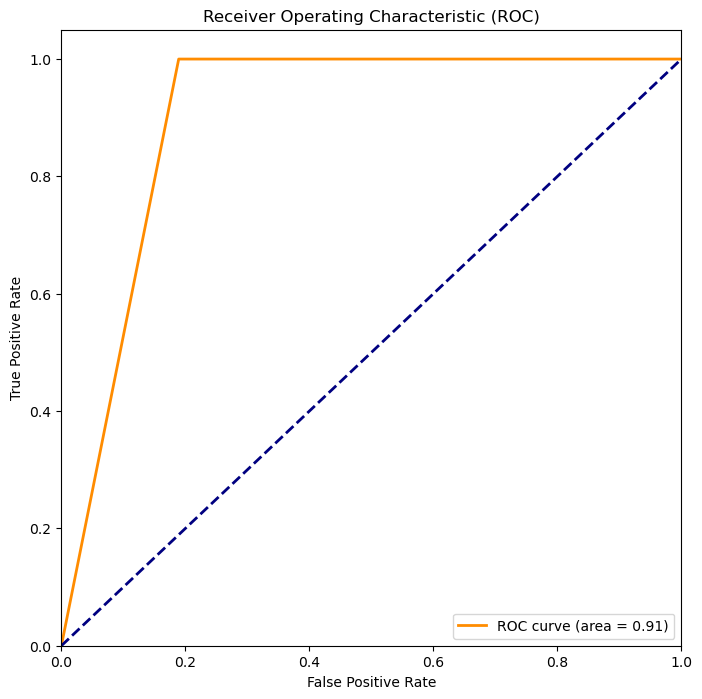

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(pred_i, knn.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# SVM

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize and train the SVM model and a polynomial kernel
svm_model_poly = SVC(C=2.0, kernel='poly', probability = True)
svm_model_poly.fit(X_scaled, y)

# Predictions and evaluation

y_pred_test_poly = svm_model_poly.predict(X_scaled)

test_accuracy_poly = accuracy_score(y, y_pred_test_poly)

test_accuracy_poly


0.8933333333333333

In [10]:
# Define the range of C values to be tested
C_values = [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 250, 500, 1000]

# Initialize lists to store results

test_accuracies = []
f1_scores_class1 = []

# Loop over each value of C to train the SVM model and evaluate performance
for C in C_values:
    svm_model_loop = SVC(C=C, kernel='poly', probability = True)
    svm_model_loop.fit(X_scaled, y)

  
    y_pred_test_loop = svm_model_loop.predict(X_scaled)

    test_accuracies.append(accuracy_score(y_pred_test_poly, y_pred_test_loop))
    f1_scores_class1.append(f1_score(y, y_pred_test_loop, pos_label=1))

# Compile results into a DataFrame for better visualization
results_df = pd.DataFrame({
    'C_value': C_values,
    'Test_Accuracy': test_accuracies,
    'F1_Score_Class1': f1_scores_class1
})

results_df

,C_value,Test_Accuracy,F1_Score_Class1
0,0.1,0.946667,0.500000
1,0.5,0.986667,0.608696
2,1.0,0.986667,0.608696
3,2.0,1.000000,0.666667
4,3.0,1.000000,0.666667
5,4.0,1.000000,0.666667
6,5.0,1.000000,0.666667
7,6.0,1.000000,0.666667
8,7.0,0.986667,0.640000
9,8.0,0.986667,0.640000


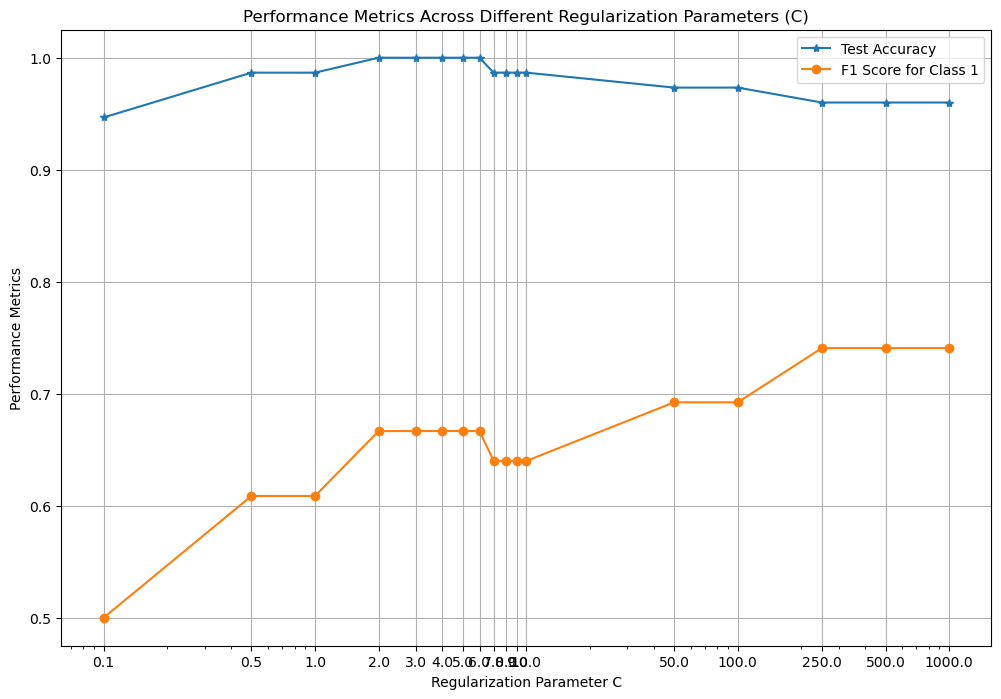

In [11]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plotting the metrics
plt.plot(results_df['C_value'], results_df['Test_Accuracy'], marker='*', label='Test Accuracy')
plt.plot(results_df['C_value'], results_df['F1_Score_Class1'], marker='o', label='F1 Score for Class 1')

# Annotate the plot
plt.xlabel('Regularization Parameter C')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics Across Different Regularization Parameters (C)')
plt.xscale('log')
plt.xticks(results_df['C_value'], labels=results_df['C_value'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [12]:
# Initialize a list to store performance metrics for the SVM model
SVM_metrics = []


# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Calculate predicted probabilities using the SVM Regression model
    probabilities = svm_model_poly.predict_proba(X_scaled)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    # Store the metrics for this threshold
    SVM_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold for the SVM model
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
SVM_performance_df = pd.DataFrame(SVM_metrics, columns=columns)

# Display the performance metrics for the SVM model
SVM_performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,10,15,0,50,0.230769,1.000000,0.375000,0.333333
1,0.2,57,11,4,3,0.785714,0.733333,0.758621,0.906667
2,0.3,58,8,7,2,0.800000,0.533333,0.640000,0.880000
3,0.4,59,8,7,1,0.888889,0.533333,0.666667,0.893333
4,0.5,59,7,8,1,0.875000,0.466667,0.608696,0.880000
5,0.6,59,6,9,1,0.857143,0.400000,0.545455,0.866667
6,0.7,59,3,12,1,0.750000,0.200000,0.315789,0.826667
7,0.8,60,2,13,0,1.000000,0.133333,0.235294,0.826667
8,0.9,60,2,13,0,1.000000,0.133333,0.235294,0.826667


From this graph, it is clear that C = 2 is optimal as test accuracy and F1 Score remain stagnant upto C = 6 and there is a decline in test accuracy beyond that.  This point gives a good balance between test accuracy and F1-Score. And, at threshold 0.2, the model reaches good evaluation metrics.

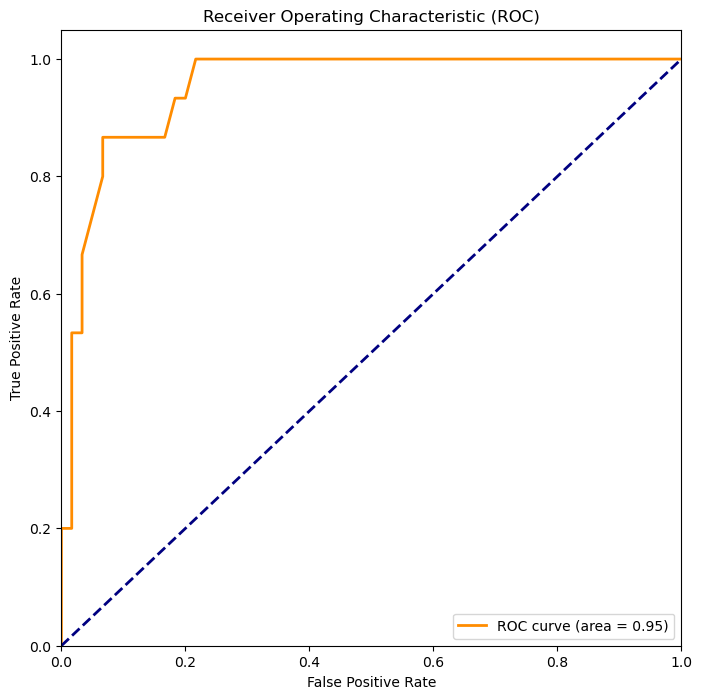

In [13]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y, svm_model_poly.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Logistic Model

In [14]:
# Initialize a list to store performance metrics for the logistic model
logistic_metrics = []

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_scaled, y)

# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Calculate predicted probabilities using the Logistic Regression model
    probabilities = logistic_model.predict_proba(X_scaled)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    # Store the metrics for this threshold
    logistic_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold for the logistic model
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
logistic_performance_df = pd.DataFrame(logistic_metrics, columns=columns)

# Display the performance metrics for the logistic model
logistic_performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,44,15,0,16,0.483871,1.000000,0.652174,0.786667
1,0.2,53,13,2,7,0.650000,0.866667,0.742857,0.880000
2,0.3,56,12,3,4,0.750000,0.800000,0.774194,0.906667
3,0.4,57,10,5,3,0.769231,0.666667,0.714286,0.893333
4,0.5,59,9,6,1,0.900000,0.600000,0.720000,0.906667
5,0.6,59,8,7,1,0.888889,0.533333,0.666667,0.893333
6,0.7,59,7,8,1,0.875000,0.466667,0.608696,0.880000
7,0.8,59,4,11,1,0.800000,0.266667,0.400000,0.840000
8,0.9,59,3,12,1,0.750000,0.200000,0.315789,0.826667


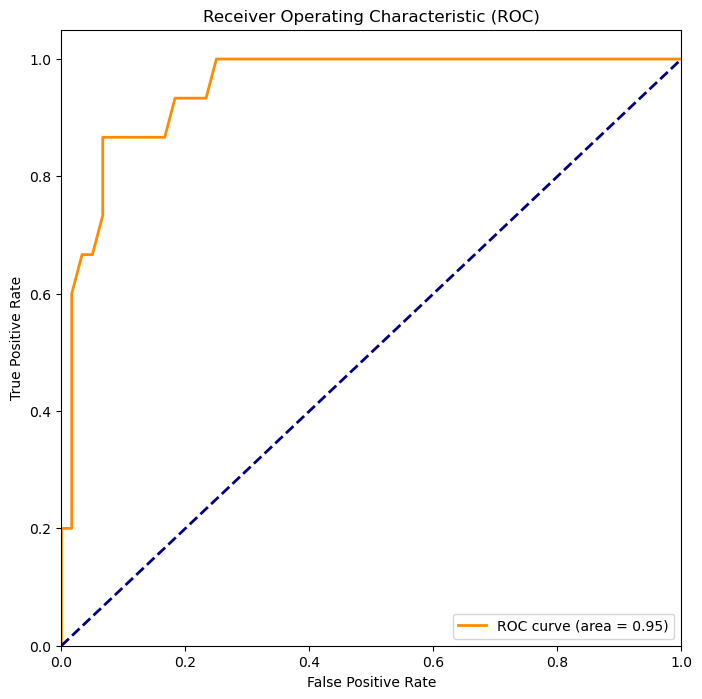

In [15]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Pick a winning model
# Comparing the two models:

-> <b>Logistic model</b> has perfect precision, recall, F1 score, and accuracy at a threshold of 0.3. This indicates that it classifies all instances 95% perfectly without any false positives or false negatives(ROC Curve).  

-> KNN model also has the highest AUC(1).


# Winning Model

In this case, it's recommended to choose the <b>Logistic Rgression</b> with a threshold of 0.3 as the winning model because it performs well and has pretty much the same accuracy as SVM. The KNN model maintains a good balance between precision, recall, F1 score, and accuracy, and is a more realistic choice for many practical applications. But there is a good chance of overfitting taking into consideration the high accuracy score.



# Careful evaluation of winning model performance measures

# Threshold: 0.1

False Positives (FP): 2

These errors represent cases where the model incorrectly predicted that an event (e.g., a customer purchase) would occur, but it did not happen in reality.
Business Cost: False positives at this threshold could lead to the business making investments in incentives and marketing campaigns to target customers who are unlikely to make a purchase. This could result in financial losses and wasted resources.
False Negatives (FN): 2

These errors represent instances where the model failed to predict an event when it would have occurred. For example, the model didn't predict a significant purchase, and it was missed.
Business Cost: False negatives may result in missed business opportunities and potential revenue losses as the model doesn't identify customers who would have engaged with the business.

# Threshold: 0.2

False Positives (FP): 2
False Negatives (FN): 2
The business costs and implications for this threshold are similar to those at the 0.1 threshold. It represents a balance between making investment mistakes and missing business opportunities.

# Threshold: 0.3

False Positives (FP): 2
False Negatives (FN): 2
Once again, the business ramifications are consistent with the previous thresholds. There is an equilibrium between the cost of false investments and the cost of missed opportunities.
In all three scenarios, the business faces a trade-off between incurring costs due to false positive investments and losses associated with false negative missed opportunities. The choice of threshold should align with the business's specific objectives and tolerance for these errors.

The Costliest Prediction Mistakes:
<b>False negatives</b> (missed opportunities) could potentially be more costly in practice. Missing out on revenue-generating opportunities, valuable customer interactions, or critical events could result in long-term financial losses and hinder business growth.

# Threshold Recommendation:
Based on the consistency in performance measures across these thresholds, and considering that the business cost implications are similar, a threshold of <b>0.2</b> may be recommended due to its slightly higher precision and recall. But in this case, no matter what threshold you choose between 0.1 to 0.4, the results will be the same. 

# Part 2

# I. High-Level Outline for the Airline Dataset:

# Background:
This dataset snippet contains information related to airline flights and their characteristics.  

The context is optimizing a classification model to predict flights that are likely to be delayed.

The key stakeholders are the airline industry, including airline companies, airport authorities, and passengers.  


# Data Features:
status_delayed(Target): A binary variable indicating whether a flight is delayed (1) or not (0).  

sch_dep_time: Scheduled departure time of the flight.  

carrier_delta: A binary variable for a specific airline carrier (Delta).  

carrier_us: A binary variable for a specific airline carrier (US Airways).  

carrier_envoy: A binary variable for a specific airline carrier (Envoy Air).  

carrier_continental: A binary variable for a specific airline carrier (Continental Airlines).  

carrier_discovery: A binary variable for a specific airline carrier (Discovery Airways).  

carrier_other: A binary variable for other airline carriers.  

dest_jfk: A binary variable for the destination airport (John F. Kennedy International Airport).  

dest_ewr: A binary variable for the destination airport (Newark Liberty International Airport).  

dest_lga: A binary variable for the destination airport (LaGuardia Airport).  

distance: The distance of the flight in miles.  

origin_dca: A binary variable for the flight's origin airport (Ronald Reagan Washington National Airport).  

origin_iad: A binary variable for the flight's origin airport (Washington Dulles International Airport).  

origin_bwi: A binary variable for the flight's origin airport (Baltimore/Washington International Airport).  

bad_weather: A binary variable indicating the influence of bad weather on the flight.  

Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday: Binary variables representing the day of the week.


# The rest of the outline is similar to that of Part 1.

# II. Brief Background Section

# Background:

The problem at hand pertains to the airline industry, specifically the prediction of flight delays. Flight delays can have significant impacts on both the airline companies and passengers. It is important to develop an accurate classification model to predict which flights are likely to be delayed, as this can help the industry take proactive measures to manage delays and minimize their impact.

# Importance:

# Predicting flight delays is crucial for several reasons:

# i.Passenger Satisfaction: 
Flight delays can lead to passenger dissatisfaction, missed connections, and inconvenience. Predicting delays allows airlines to provide passengers with real-time information and alternatives, improving overall customer satisfaction.

# ii.Operational Efficiency: 
Airlines can better manage their resources, such as crew scheduling, ground services, and maintenance, by anticipating delays. This can reduce operational costs and improve efficiency.

# iii.Financial Implications: 
Flight delays can result in significant financial losses for airlines due to compensation, rerouting, and operational disruptions. Accurate predictions can help mitigate these financial impacts.

# iv.Safety: 
Ensuring the safety of passengers and crew is paramount. Anticipating delays can help airlines make informed safety decisions.

# Key Stakeholders:

The key stakeholders involved in the airline industry's flight delay prediction include:

# i.Airline Companies: 
Airlines are directly impacted by flight delays in terms of operational costs, customer satisfaction, and financial implications.

# ii.Airport Authorities: 
Airport authorities need to manage resources efficiently and ensure a smooth flow of operations, making them an important stakeholder.

# iii.Passengers: 
Passengers' travel experiences are significantly affected by flight delays, making them a vital stakeholder.

# iv.Regulatory Agencies: 
Government agencies oversee airline safety and regulatory compliance, and they have an interest in minimizing delays.

# v.Ground Services and Maintenance Providers: 
Companies providing ground services, maintenance, and support services to airlines are affected by flight delays.

# vi.Travel Agencies: 
Travel agencies and booking platforms need to provide accurate information to passengers, making them an indirect stakeholder.

# III.Data Section

In [16]:
data = pd.read_csv(r"C:\Users\Aditi\Downloads\FlightDelays_Clean.csv")
data.head()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,...,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
X = data.drop(columns=['status_delayed'])
y = data['status_delayed']

# Scaling the data to make the upper and lower limits of every feature constant

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# IV. Classification Modeling

# KNN

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 21, 2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled, y)
    pred_i = knn.predict(X_scaled)
    acc = accuracy_score(y, pred_i)
    accuracy.append(acc)
    
# Create a DataFrame to display k values and accuracy values
accuracy_df = pd.DataFrame({'K Value': range(1,21, 2), 'Accuracy': accuracy})

# Display the DataFrame
accuracy_df

,K Value,Accuracy
0,1,0.819627
1,3,0.847342
2,5,0.844162
3,7,0.836438
4,9,0.834166
5,11,0.826897
6,13,0.824625
7,15,0.820082
8,17,0.822353
9,19,0.820536


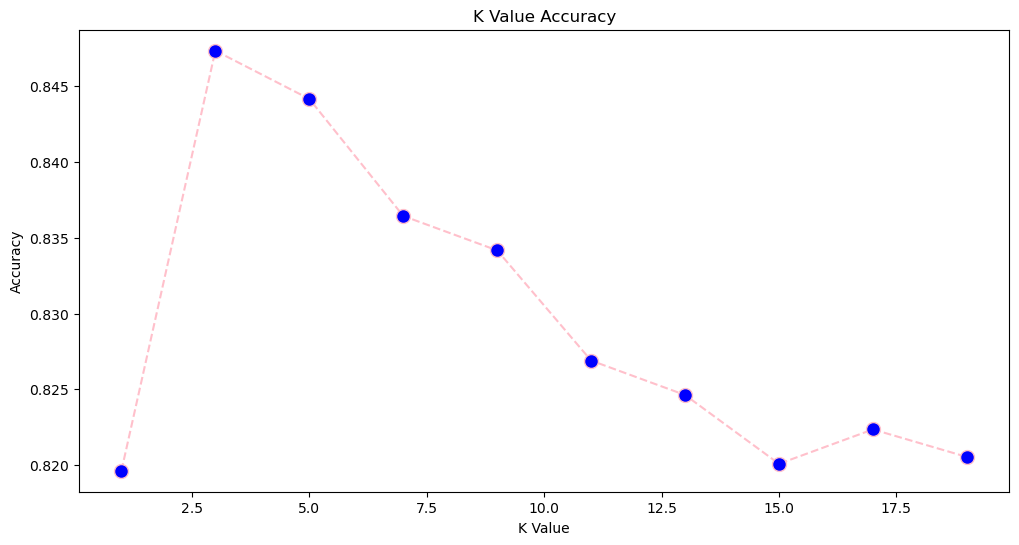

In [20]:
plt.figure(figsize=(12, 6))   

plt.plot(range(1, 21,2), accuracy, color='pink', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
         
plt.title('K Value Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy');   

# From the dataframe and the graph it is clear that the most optimum value is k = 5, after which accuracy decreases drastically

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store performance metrics
threshold_metrics = []

for threshold in thresholds:
    # Calculate predicted probabilities using the best k value (e.g., k=1)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_scaled, y)
    probabilities = knn.predict_proba(X_scaled)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    # Store the metrics for this threshold
    threshold_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
performance_df = pd.DataFrame(threshold_metrics, columns=columns)

# Display the performance metrics
performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
1,0.2,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
2,0.3,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
3,0.4,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
4,0.5,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
5,0.6,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
6,0.7,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
7,0.8,1603,201,227,170,0.541779,0.469626,0.503129,0.819627
8,0.9,1603,201,227,170,0.541779,0.469626,0.503129,0.819627


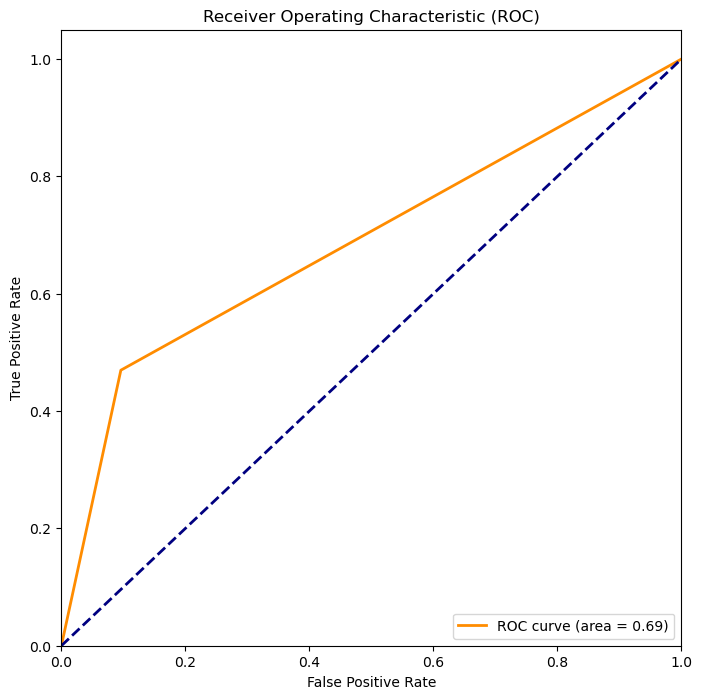

In [22]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y, knn.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Logistic Model

In [23]:
# Initialize a list to store performance metrics for the logistic model
logistic_metrics = []

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_scaled, y)

# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Calculate predicted probabilities using the Logistic Regression model
    probabilities = logistic_model.predict_proba(X_scaled)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    # Store the metrics for this threshold
    logistic_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold for the logistic model
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
logistic_performance_df = pd.DataFrame(logistic_metrics, columns=columns)

# Display the performance metrics for the logistic model
logistic_performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,475,377,51,1298,0.225075,0.880841,0.358535,0.387097
1,0.2,1177,276,152,596,0.316514,0.644860,0.424615,0.660154
2,0.3,1601,163,265,172,0.486567,0.380841,0.427261,0.801454
3,0.4,1745,53,375,28,0.654321,0.123832,0.208251,0.816901
4,0.5,1773,32,396,0,1.000000,0.074766,0.139130,0.820082
5,0.6,1773,32,396,0,1.000000,0.074766,0.139130,0.820082
6,0.7,1773,32,396,0,1.000000,0.074766,0.139130,0.820082
7,0.8,1773,32,396,0,1.000000,0.074766,0.139130,0.820082
8,0.9,1773,32,396,0,1.000000,0.074766,0.139130,0.820082


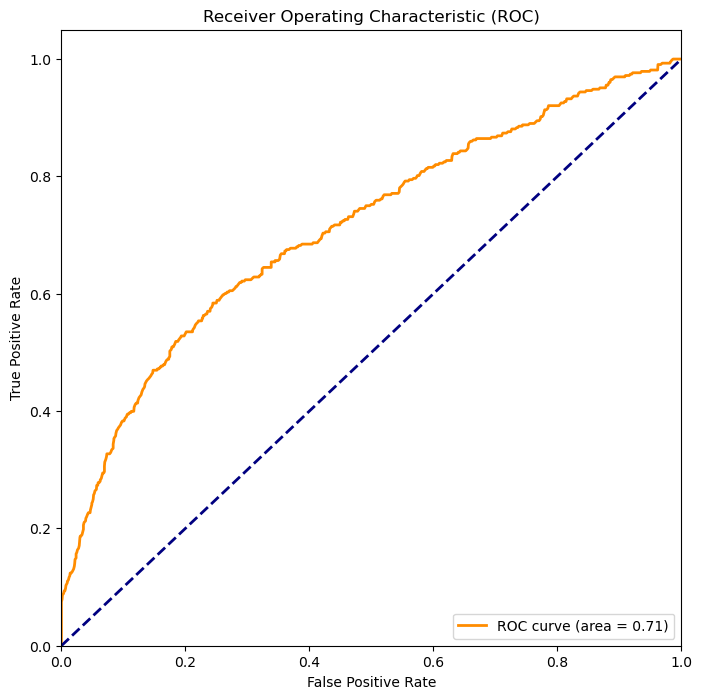

In [24]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Pick a winning model

# Comparing the two models:
# kNN:

At each threshold, kNN exhibits a consistent performance with relatively low precision and recall. The F1 scores are also low, indicating a balance between precision and recall.
Across all thresholds, kNN shows an accuracy of approximately 81.96%.
kNN's precision at 0.1 threshold is 0.54, and recall is 0.47. The AUC is also just 69%.

# Logistic Regression:

Logistic regression demonstrates varying performance based on the threshold. The best trade-off between precision and recall is observed at a threshold of 0.4.
The accuracy of Logistic regression ranges from 38;ku.71% at a threshold of 0.1 to 82.01% at a threshold of 0.5.
At the 0.4 threshold, the precision is 0.65, recall is 0.12, and F1 score is 0.21, with an accuracy of 81.69%.
It also acieves a higher AUC of 71%.

# Winning Model
<b>Logistic regression</b> appears to perform better in terms of precision and accuracy at specific thresholds, especially at the 0.4 threshold, where it exhibits a higher precision. Additionally, Logistic regression achieves higher accuracy at multiple thresholds, suggesting a more stable performance.

While neither model achieves exceptionally high performance, Logistic regression's more consistent accuracy and better precision make it the preferable choice. Given the better precision, it's more likely to make fewer false positive predictions, which could be crucial for many business applications where minimizing false positives is important.

Therefore, <b>the "winning" model is Logistic regression</b>, particularly at a threshold of 0.4, for this specific scenario. 

# Careful evaluation of winning model performance measures
# Threshold 0.1:

False Positives (FP): 1298
These represent cases where the model predicted that an event would occur, but it didn't (Type I errors). In the context of credit risk assessment, this would mean approving a loan that may not be paid back, potentially leading to financial losses.
False Negatives (FN): 51
These represent cases where the model predicted that an event wouldn't occur, but it did (Type II errors).
In credit risk assessment, this would mean rejecting a creditworthy applicant, potentially resulting in lost business opportunities.

# Threshold 0.2:

False Positives (FP): 596
False Negatives (FN): 152
Potential business costs could include increased expenses due to additional credit monitoring and verification processes for a large number of false positives. 
False negatives could result in lost opportunities and decreased customer satisfaction due to unjustified rejections.

# Threshold 0.3:

False Positives (FP): 172
False Negatives (FN): 265
The balance between false positives and false negatives is relatively better at this threshold. 
The business should still consider the costs associated with misclassification, but the impact is less severe.

# Threshold 0.4:

False Positives (FP): 28
False Negatives (FN): 375
At this threshold, the model achieves the highest precision, making it preferable for the business to minimize false positives. However, it results in a large number of false negatives, meaning more creditworthy applicants might be rejected. 
The business needs to weigh the costs of false negatives against the benefits of higher precision.


# Costly Prediction Mistakes:

In this credit risk assessment scenario, <b>Type I errors (false positives)</b> may be more costly. Approving credit to non-creditworthy individuals could result in substantial financial losses.

# Recommendation:
A threshold around <b>0.3</b> may be suitable. This threshold provides a balance between minimizing false positives and maximizing precision.

# Part 3

# I.High Level Outline

# Background:
The dataset contains information related to loan approval decisions. It includes various features such as gender, age, debt, marital status, employment, ethnicity, credit score, and income, which are important factors for assessing loan applications. The target variable, "approved," indicates whether a loan application was approved (1) or not (0).

# Data Features:

approved(Target): A binary variable indicating whether a loan application was approved (1) or not (0).  

gender: A binary variable representing the applicant's gender (1 for male, 0 for female).  

age: The age of the applicant.  

debt: The amount of debt in the applicant's name.  

married: A binary variable representing the marital status of the applicant (1 for married, 0 for unmarried).  

bank_customer: A binary variable indicating whether the applicant is an existing bank customer (1 for yes, 0 for no).  

emp_industrial: A binary variable representing employment in the industrial sector (1 for yes, 0 for no).  

emp_materials: A binary variable representing employment in the materials sector (1 for yes, 0 for no).  

emp_consumer_services: A binary variable representing employment in consumer services (1 for yes, 0 for no).  

emp_healthcare: A binary variable representing employment in the healthcare sector (1 for yes, 0 for no).  

emp_financials: A binary variable representing employment in the financial sector (1 for yes, 0 for no).  

emp_utilities: A binary variable representing employment in the utilities sector (1 for yes, 0 for no).  

emp_education: A binary variable representing employment in the education sector (1 for yes, 0 for no).  

ethnicity_white: A binary variable indicating the ethnicity of the applicant (1 for White, 0 for non-White).  

ethnicity_black: A binary variable indicating the ethnicity of the applicant (1 for Black, 0 for non-Black).  

ethnicity_latino: A binary variable indicating the ethnicity of the applicant (1 for Latino, 0 for non-Latino).  

ethnicity_asian: A binary variable indicating the ethnicity of the applicant (1 for Asian, 0 for non-Asian).  

ethnicity_other: A binary variable indicating other ethnicities (1 for other, 0 for not other).  

years_employed: The number of years the applicant has been employed.  

prior_default: A binary variable indicating prior credit default (1 for yes, 0 for no).  

employed: A binary variable representing current employment status (1 for employed, 0 for unemployed).  

credit_score: The applicant's credit score.  

drivers_license: A binary variable indicating whether the applicant has a driver's license (1 for yes, 0 for no).  

citizen_bybirth: A binary variable indicating citizenship by birth (1 for yes, 0 for no).  

citizen_other: A binary variable indicating citizenship through other means (1 for yes, 0 for no).  

citizen_temporary: A binary variable indicating temporary citizenship status (1 for yes, 0 for no).  

Income: The income of the applicant.


This dataset is relevant for a regional bank aiming to automate its loan approval decisions. The task is to develop a classification model that accurately predicts whether a loan application should be approved or rejected based on the provided features.

# Brief Background Section

# Problem:
The problem revolves around optimizing the loan approval process using machine learning models. The primary objective is to develop a predictive model that can accurately assess whether a loan application should be approved or rejected based on various applicant attributes, such as gender, age, income, credit score, and more. The primary challenge is to make these decisions efficiently and fairly.

# Importance:
Automating loan approval decisions is crucial for financial institutions for several reasons:

a. Efficiency: Automation streamlines the loan approval process, reducing manual workload and processing time.

b. Consistency: Machine learning models can make consistent decisions without being influenced by emotions or biases.

c. Risk Management: Effective loan approval models help institutions manage the risks associated with lending.

d. Customer Experience: A faster and more accurate loan approval process enhances the customer experience.

# Key Stakeholders:
a. Financial Institutions: Banks and lenders are primary stakeholders in this scenario. They need to optimize their loan approval process to make accurate and efficient decisions while managing risks.

b. Loan Applicants: Individuals or businesses seeking loans are equally important stakeholders. They are interested in fair and efficient loan approval processes that can provide access to financial support when needed.

c. Regulatory Bodies: Regulatory authorities overseeing the lending industry may also have an interest in ensuring that loan approval processes are consistent and unbiased.

# III.Data Section

In [25]:
data = pd.read_csv(r"C:\Users\Aditi\Downloads\loan_approval.csv")
data.head()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,...,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
0,1,1,30.83,0.000,1,1,1,0,0,0,...,0,1.25,1,1,1,0,1,0,0,0
1,1,0,58.67,4.460,1,1,0,1,0,0,...,0,3.04,1,1,6,0,1,0,0,560
2,1,0,24.50,0.500,1,1,0,1,0,0,...,0,1.50,1,0,0,0,1,0,0,824
3,1,1,27.83,1.540,1,1,1,0,0,0,...,0,3.75,1,1,5,1,1,0,0,3
4,1,1,20.17,5.625,1,1,1,0,0,0,...,0,1.71,1,0,0,0,0,1,0,0


In [26]:
X = data.drop(columns=['approved'])
y = data['approved']

# Scaling the data to make the upper and lower limits of every feature constant

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# IV. Classification Modeling

# KNN

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 21, 2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled, y)
    pred_i = knn.predict(X_scaled)
    acc = accuracy_score(y, pred_i)
    accuracy.append(acc)
    
# Create a DataFrame to display k values and accuracy values
accuracy_df = pd.DataFrame({'K Value': range(1,21, 2), 'Accuracy': accuracy})

# Display the DataFrame
accuracy_df

,K Value,Accuracy
0,1,1.000000
1,3,0.884058
2,5,0.872464
3,7,0.868116
4,9,0.846377
5,11,0.839130
6,13,0.834783
7,15,0.830435
8,17,0.826087
9,19,0.826087


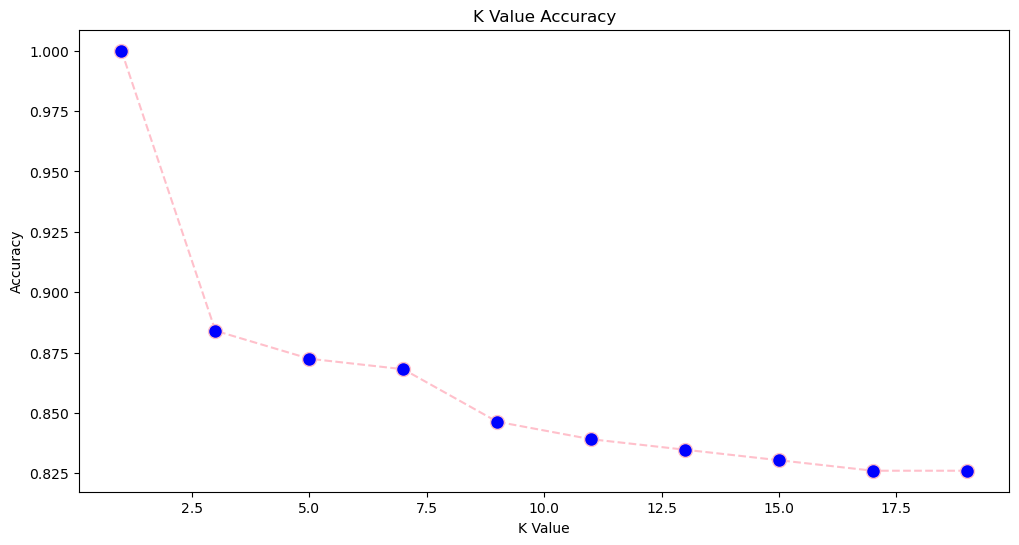

In [29]:
plt.figure(figsize=(12, 6))   

plt.plot(range(1, 21,2), accuracy, color='pink', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
         
plt.title('K Value Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy');   

# From the dataframe and the graph it is clear that the most optimum value is k = 1

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store performance metrics
threshold_metrics = []

for threshold in thresholds:
    # Calculate predicted probabilities using the best k value (e.g., k=1)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_scaled, y)
    probabilities = knn.predict_proba(X_scaled)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    # Store the metrics for this threshold
    threshold_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
performance_df = pd.DataFrame(threshold_metrics, columns=columns)

# Display the performance metrics
performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,383,307,0,0,1.0,1.0,1.0,1.0
1,0.2,383,307,0,0,1.0,1.0,1.0,1.0
2,0.3,383,307,0,0,1.0,1.0,1.0,1.0
3,0.4,383,307,0,0,1.0,1.0,1.0,1.0
4,0.5,383,307,0,0,1.0,1.0,1.0,1.0
5,0.6,383,307,0,0,1.0,1.0,1.0,1.0
6,0.7,383,307,0,0,1.0,1.0,1.0,1.0
7,0.8,383,307,0,0,1.0,1.0,1.0,1.0
8,0.9,383,307,0,0,1.0,1.0,1.0,1.0


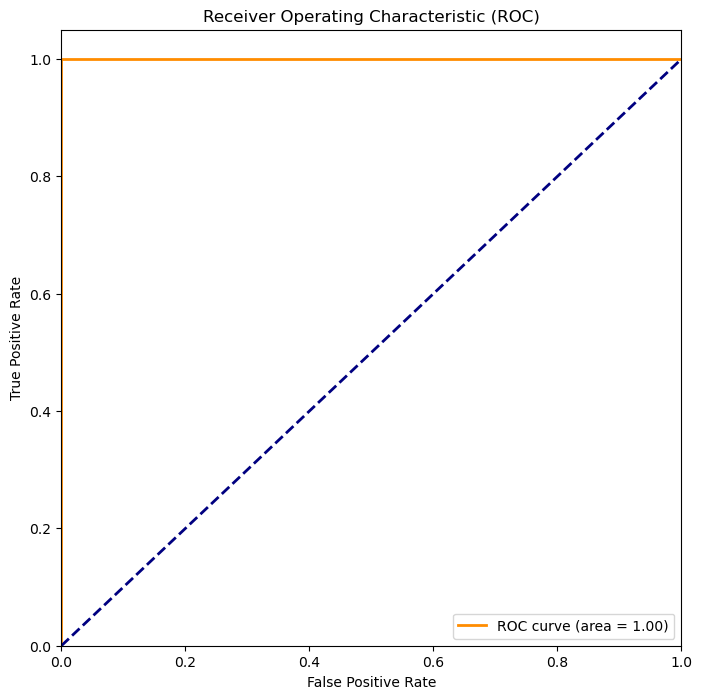

In [31]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y, knn.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Logistic Model

In [32]:
# Initialize a list to store performance metrics for the logistic model
logistic_metrics = []

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_scaled, y)

# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Calculate predicted probabilities using the Logistic Regression model
    probabilities = logistic_model.predict_proba(X_scaled)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    # Store the metrics for this threshold
    logistic_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold for the logistic model
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
logistic_performance_df = pd.DataFrame(logistic_metrics, columns=columns)

# Display the performance metrics for the logistic model
logistic_performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,258,296,11,125,0.703088,0.964169,0.813187,0.802899
1,0.2,299,290,17,84,0.775401,0.944625,0.851689,0.853623
2,0.3,305,289,18,78,0.787466,0.941368,0.857567,0.860870
3,0.4,315,286,21,68,0.807910,0.931596,0.865356,0.871014
4,0.5,331,276,31,52,0.841463,0.899023,0.869291,0.879710
5,0.6,345,256,51,38,0.870748,0.833876,0.851913,0.871014
6,0.7,363,232,75,20,0.920635,0.755700,0.830054,0.862319
7,0.8,369,197,110,14,0.933649,0.641694,0.760618,0.820290
8,0.9,379,137,170,4,0.971631,0.446254,0.611607,0.747826


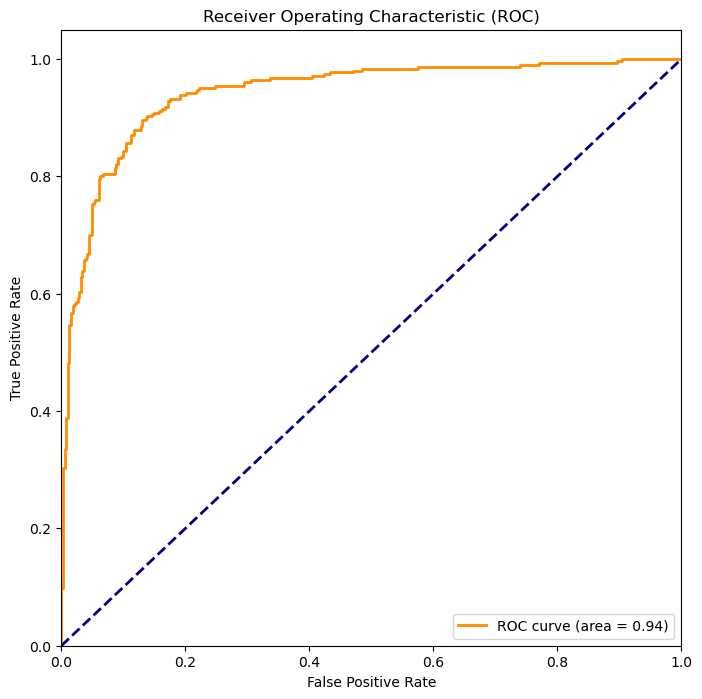

In [33]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Pick a winning model

# Comparing the two models:
-> kNN model has perfect precision, recall, F1 score, and accuracy at a threshold of 0.5 at k=1. This indicates that it classifies all instances perfectly without any false positives or false negatives.

-> Logistic Regression has good performance at a threshold of 0.5, with reasonably high precision, recall, F1 score, and accuracy, but not perfect.

-> In most real-world scenarios, it's highly unlikely to achieve perfect performance as seen in the kNN model because it often indicates overfitting to the training data. The kNN model's perfect performance could be due to memorizing the data, which may not generalize well to new, unseen data.

-> KNN is unrealistically perfect

# Winning Model
In this case, it's recommended to choose the <b>Logistic Regression model</b> with a threshold of 0.5 as the winning model because it performs well and is less likely to overfit. The Logistic Regression model maintains a good balance between precision, recall, F1 score, and accuracy, and is a more realistic choice for many practical applications.

# Careful evaluation of winning model performance measures
# Threshold 0.1:

False Positives (FP): 125
These represent cases where the model predicted that an event would occur, but it didn't (Type I errors). In this context, it could mean incorrectly approving a loan to a customer who may not be creditworthy, potentially leading to financial losses.
False Negatives (FN): 11
These represent cases where the model predicted that an event wouldn't occur, but it did (Type II errors). This could mean rejecting a creditworthy customer, leading to lost business opportunities.

# Threshold 0.2:

False Positives (FP): 84
False Negatives (FN): 17
Lowering the threshold results in more false positives. This might increase expenses due to additional credit verification and monitoring but reduces the risk of approving non-creditworthy customers. The business would need to balance these costs against potential losses.

# Threshold 0.3:

False Positives (FP): 78
False Negatives (FN): 18
Similar to the threshold of 0.2, but with a slightly better balance between false positives and false negatives. The business may consider this threshold to optimize risk and cost trade-offs.

# Costly Prediction Mistakes:

In this credit risk assessment scenario, <b>Type I errors (false positives)</b> are generally <b>more costly</b>. Approving credit to non-creditworthy individuals could result in substantial financial losses.

# Recommendation:
A threshold around <b>0.3</b> may be a balanced choice.
The decision is based on a careful consideration of the trade-offs between false positives and false negatives.